In [ ]:
# ---------------------------- PART 1 -------------------------------

# The tb dataset countains tuberculosis counts from 2000-2018.
# There are 6 variables: year, age, category, race, sex, Us-Born and Tb Count

In [1]:
# We always need pandas and numpy
import pandas as pd
import numpy as np

In [2]:
# 1. Read in the data. There should be 19 rows and 193 columns.
# There is content at the top/bottom to be ignored.

# Read in the data without top 8 and bottom 2
messyTb = pd.read_csv('tb-dataplanet.csv', 
            skiprows = [i for i in range(0,8)],
           skipfooter=2, engine = 'python')

# Make sure we got what we wanted
messyTb.head()

,Time,0-4 - White - Male - Non-U.S.-born,0-4 - White - Male - US-born,0-4 - White - Female - Non-U.S.-born,0-4 - White - Female - US-born,0-4 - Black - Male - Non-U.S.-born,0-4 - Black - Male - US-born,0-4 - Black - Female - Non-U.S.-born,0-4 - Black - Female - US-born,0-4 - American Indian - Male - Non-U.S.-born,...,65+ - Asian - Female - Non-U.S.-born,65+ - Asian - Female - US-born,65+ - Hawaiian or other Pacific Islander - Male - Non-U.S.-born,65+ - Hawaiian or other Pacific Islander - Male - US-born,65+ - Hawaiian or other Pacific Islander - Female - Non-U.S.-born,65+ - Hawaiian or other Pacific Islander - Female - US-born,65+ - Hispanic - Male - Non-U.S.-born,65+ - Hispanic - Male - US-born,65+ - Hispanic - Female - Non-U.S.-born,65+ - Hispanic - Female - US-born
0,2000,3,31,5,30,3,85,8,77,0,...,256,5,2,1,2,4,199,84,139,67
1,2001,6,27,6,21,13,68,5,78,0,...,295,7,1,2,1,2,211,85,162,69
2,2002,5,26,6,23,3,88,6,81,0,...,266,11,1,1,2,1,235,56,149,58
3,2003,6,24,2,22,5,66,7,65,0,...,277,6,4,0,1,4,222,76,149,53
4,2004,9,20,3,14,19,63,6,61,0,...,274,7,0,1,1,2,235,96,157,61


In [3]:
# 2. Convert the DataFrame into a Tidy DataFrame

# The columns we want to keep
id_vars = messyTb.columns.values[0]

# Making one variable
messyMelted = pd.melt(frame = messyTb, id_vars = id_vars, var_name = 'MessyVars', value_name = 'TB')

# Make sure it worked
messyMelted


,Time,MessyVars,TB
0,2000,0-4 - White - Male - Non-U.S.-born,3
1,2001,0-4 - White - Male - Non-U.S.-born,6
2,2002,0-4 - White - Male - Non-U.S.-born,5
3,2003,0-4 - White - Male - Non-U.S.-born,6
4,2004,0-4 - White - Male - Non-U.S.-born,9
...,...,...,...
3643,2014,65+ - Hispanic - Female - US-born,27
3644,2015,65+ - Hispanic - Female - US-born,34
3645,2016,65+ - Hispanic - Female - US-born,35
3646,2017,65+ - Hispanic - Female - US-born,30


In [4]:
# New column for age
messyMelted['Age'] = ""

# Loop through the dataset
for i in range(0, len(messyMelted)):
    
    # Assign age as the first 4 values in MessyVars string
    messyMelted['Age'][i] = messyMelted['MessyVars'][i][0:3]

# Make sure we did this right
messyMelted.head(50)

# Check value counts
messyMelted['Age'].value_counts()

/var/folders/dz/brzyldnd7cq32fnrw7lv3dpm0000gn/T/ipykernel_55789/1162556314.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messyMelted['Age'][i] = messyMelted['MessyVars'][i][0:3]


0-4    456
05-    456
15-    456
25-    456
35-    456
45-    456
55-    456
65+    456
Name: Age, dtype: int64

In [5]:
# Let's do the same thing for race and sex
messyMelted['Race'] = ""
messyMelted['Sex'] = ""

# Loop through the dataset
for i in range(0, len(messyMelted)):
    
    # Assign Race as the 6th through 11th values of the string
    messyMelted['Race'][i] = messyMelted['MessyVars'][i][6:11]
    
    # ----------------------------- IF THE PERSON IS WHITE ---------------------------
    if (messyMelted['Race'][i] == "- Whi" or messyMelted['Race'][i] == "White"):
        messyMelted['Race'][i] = "White"
        
        # Assign the sex
        messyMelted['Sex'][i] = messyMelted['MessyVars'][i][16:19]
        
        # The 65+ String makes it strange, need to control
        if (messyMelted['Sex'][i] == "le "):
            messyMelted['Sex'][i] = "Mal"
            
        # If they are female
        elif (messyMelted['Sex'][i] == "mal"):
            messyMelted['Sex'][i] = "Fem"
    
        
    # ----------------------------- IF THE PERSON IS BLACK ---------------------------
    if (messyMelted['Race'][i] == "- Bla" or messyMelted['Race'][i] == "Black"):
        messyMelted['Race'][i] = "Black"
        messyMelted['Sex'][i] = messyMelted['MessyVars'][i][16:19]
        
        # The 65+ String makes it strange, need to control
        if (messyMelted['Sex'][i] == "le "):
            messyMelted['Sex'][i] = "Mal"
            
        # If they are female
        elif (messyMelted['Sex'][i] == "mal"):
            messyMelted['Sex'][i] = "Fem"
        
    # ----------------------------- IF THE PERSON IS HISPANIC ---------------------------
    if (messyMelted['Race'][i] == "- His" or messyMelted['Race'][i] == "Hispa"):
        messyMelted['Race'][i] = "Hispanic"
        messyMelted['Sex'][i] = messyMelted['MessyVars'][i][19:22]
        
         # The 65+ String makes it strange, need to control
        if (messyMelted['Sex'][i] == "le "):
            messyMelted['Sex'][i] = "Mal"
            
        # If they are female
        elif (messyMelted['Sex'][i] == "mal"):
            messyMelted['Sex'][i] = "Fem"
        
    # ------------------------- IF THE PERSON IS AMERICAN INDIAN ---------------------------
    if (messyMelted['Race'][i] == "- Ame" or messyMelted['Race'][i] == "Ameri"):
        messyMelted['Race'][i] = "American Indian"
        messyMelted['Sex'][i] = messyMelted['MessyVars'][i][26:29]
        
                # The 65+ String makes it strange, need to control
        if (messyMelted['Sex'][i] == "le "):
            messyMelted['Sex'][i] = "Mal"
            
        # If they are female
        elif (messyMelted['Sex'][i] == "mal"):
            messyMelted['Sex'][i] = "Fem"
        
    # ------------------------- IF THE PERSON IS Hawaiin ---------------------------
    if (messyMelted['Race'][i] == "- Haw" or messyMelted['Race'][i] == "Hawai"):
        messyMelted['Race'][i] = "Hawaiian"
        messyMelted['Sex'][i] = messyMelted['MessyVars'][i][47:50]
        
                        # The 65+ String makes it strange, need to control
        if (messyMelted['Sex'][i] == "le "):
            messyMelted['Sex'][i] = "Mal"
            
        # If they are female
        elif (messyMelted['Sex'][i] == "mal"):
            messyMelted['Sex'][i] = "Fem"
            
        # If they are female
        elif (messyMelted['Sex'][i] == "   "):
            messyMelted['Sex'][i] = "Mal"
            
        # If they are female
        elif (messyMelted['Sex'][i] == " - "):
            messyMelted['Sex'][i] = "Fem"
            
              
    # ------------------------- IF THE PERSON IS ASIAN ---------------------------
    if (messyMelted['Race'][i] == "- Asi" or messyMelted['Race'][i] == "Asian"):
        messyMelted['Race'][i] = "Asian"
        messyMelted['Sex'][i] = messyMelted['MessyVars'][i][16:19]
        
        # The 65+ String makes it strange, need to control
        if (messyMelted['Sex'][i] == "le "):
            messyMelted['Sex'][i] = "Mal"
            
        # If they are female
        elif (messyMelted['Sex'][i] == "mal"):
            messyMelted['Sex'][i] = "Fem"
        
# Make sure we did this right
messyMelted['Sex'].value_counts()


/var/folders/dz/brzyldnd7cq32fnrw7lv3dpm0000gn/T/ipykernel_55789/4022241242.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messyMelted['Race'][i] = messyMelted['MessyVars'][i][6:11]
/var/folders/dz/brzyldnd7cq32fnrw7lv3dpm0000gn/T/ipykernel_55789/4022241242.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messyMelted['Race'][i] = "White"
/var/folders/dz/brzyldnd7cq32fnrw7lv3dpm0000gn/T/ipykernel_55789/4022241242.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

/var/folders/dz/brzyldnd7cq32fnrw7lv3dpm0000gn/T/ipykernel_55789/4022241242.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messyMelted['Sex'][i] = "Fem"


Mal    1824
Fem    1824
Name: Sex, dtype: int64

In [6]:
# Create a temporary are U.S Column
messyMelted['Temp'] = ""
messyMelted['US'] = ""

# Loop through the Dataset
for i in range(0, len(messyMelted)):
    
    # Reverse the string
    messyMelted['Temp'][i] = messyMelted['MessyVars'][i][::-1]
    
    # Extract whether or not they are U.S Born
    messyMelted['US'][i] = messyMelted['Temp'][i][10:13]
    
    # Exceptions
    if (messyMelted['US'][i] == "ela"):
        messyMelted['US'][i] = "1"
        
    # Exceptions
    else:
        messyMelted['US'][i] = "0"

# Drop the unessecary columns
messyMelted = messyMelted.drop(['Temp', 'MessyVars'], axis=1)

/var/folders/dz/brzyldnd7cq32fnrw7lv3dpm0000gn/T/ipykernel_55789/542630326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messyMelted['Temp'][i] = messyMelted['MessyVars'][i][::-1]
/var/folders/dz/brzyldnd7cq32fnrw7lv3dpm0000gn/T/ipykernel_55789/542630326.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messyMelted['US'][i] = messyMelted['Temp'][i][10:13]
/var/folders/dz/brzyldnd7cq32fnrw7lv3dpm0000gn/T/ipykernel_55789/542630326.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [7]:
# ANSWER: Here is the final dataset
print(messyMelted.head(50))

    Time  TB  Age   Race  Sex US
0   2000   3  0-4  White  Mal  0
1   2001   6  0-4  White  Mal  0
2   2002   5  0-4  White  Mal  0
3   2003   6  0-4  White  Mal  0
4   2004   9  0-4  White  Mal  0
5   2005   5  0-4  White  Mal  0
6   2006   3  0-4  White  Mal  0
7   2007   3  0-4  White  Mal  0
8   2008   2  0-4  White  Mal  0
9   2009   2  0-4  White  Mal  0
10  2010   1  0-4  White  Mal  0
11  2011   2  0-4  White  Mal  0
12  2012   0  0-4  White  Mal  0
13  2013   3  0-4  White  Mal  0
14  2014   1  0-4  White  Mal  0
15  2015   2  0-4  White  Mal  0
16  2016   1  0-4  White  Mal  0
17  2017   0  0-4  White  Mal  0
18  2018   1  0-4  White  Mal  0
19  2000  31  0-4  White  Mal  1
20  2001  27  0-4  White  Mal  1
21  2002  26  0-4  White  Mal  1
22  2003  24  0-4  White  Mal  1
23  2004  20  0-4  White  Mal  1
24  2005  13  0-4  White  Mal  1
25  2006  19  0-4  White  Mal  1
26  2007  15  0-4  White  Mal  1
27  2008  15  0-4  White  Mal  1
28  2009  14  0-4  White  Mal  1
29  2010  

In [8]:
# Use your tidy DataFrame to answer the following questions....
# 3a. How many total TB cases were there in 2018?

# First let's rename our columnn and dataframe
tbDf = messyMelted.rename(columns={"Time": "Year"})

# Change variables to categoricals
tbDf.US = tbDf.US.astype('category')
tbDf.Age = tbDf.Age.astype('category')
tbDf.Race = tbDf.Race.astype('category')
tbDf.Sex = tbDf.Sex.astype('category')
tbDf.Year = tbDf.Year.astype('category')

# Order them by year
tbDf = tbDf.sort_values(by=['Year', 'Age', 'Race', 'Sex', 'US'])

# Finally, reorder the columns
tbDf = tbDf.iloc[:, [0,2,3,4,5,1]]

In [9]:
# Create data of only 2018
thisDf = tbDf['Year'] == 2018
df2018 = tbDf[thisDf]

# Check total TB cases
sum(df2018['TB'])

# ANSWER: 8878 cases in 2018

8878

In [10]:
# 3b. How many total TB cases occurred for US-born hispanic females (over all years)?
thisDf = tbDf['US'] == "1"
usDf = tbDf[thisDf]

# Same thing for Race
thisDf = usDf['Race'] == "Hispanic"
raceDf = usDf[thisDf]

# And finally for sex
thisDf = raceDf['Sex'] == "Fem"
finalDf = raceDf[thisDf]

# Check
sum(finalDf['TB'])

# ANSWER: 6270 cases for US-born hispanic females of all years

6270

In [11]:
# 3c. Overall who has more TB cases - males or females?
# Also - what is the difference in the number of cases between males and females?

# Create the male dataset
tempDf = tbDf['Sex'] == "Mal"
maleDf = tbDf[tempDf]

# Same thing for females
tempDf = tbDf['Sex'] == "Fem"
femDf = tbDf[tempDf]

# Overall for men
sum(maleDf['TB'])

# Overall for women
sum(femDf['TB'])

# ANSWER: 139617 male cases vs 87929 female cases (difference of 51688)

87929

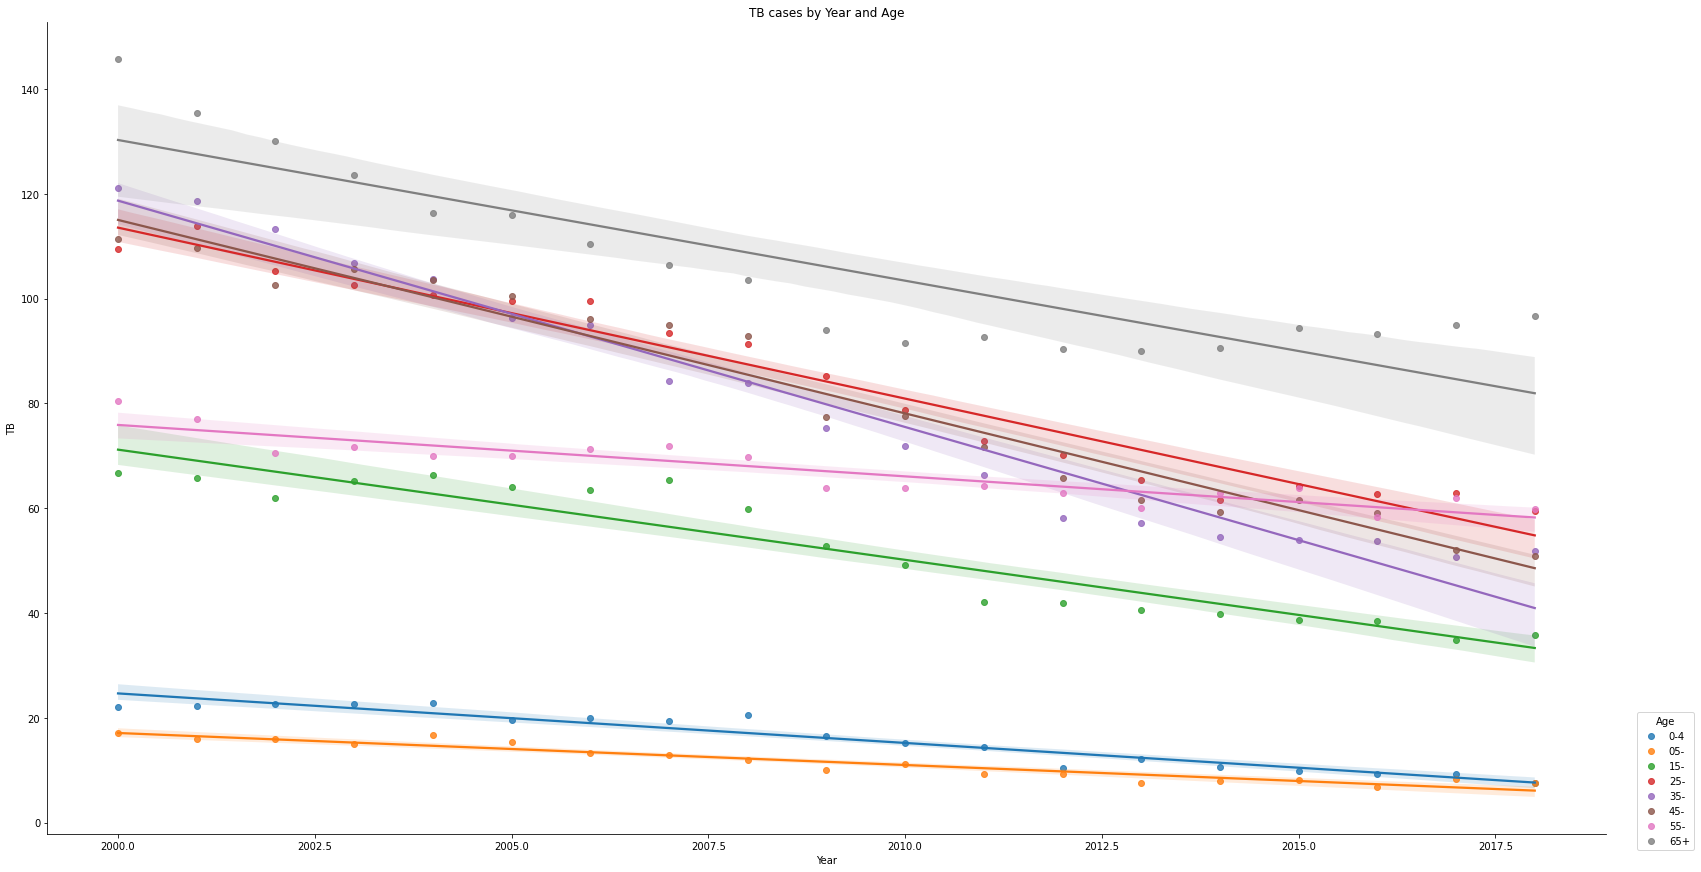

In [12]:
# 4. Plot TB count (y) by year (x) with a separate line for each age group.
# Adjust x axis so it only shows even years. Add legend on lower right and a title.

# Get matplot lib
import matplotlib.pyplot as plt

# First we need to group by year
averageTb = tbDf.groupby(['Year', 'Age']).mean()

# Reset the index
averageTb = averageTb.reset_index()

# Change year to numeric
averageTb["Year"] = pd.to_numeric(averageTb["Year"])

# Import the seaborn package
import seaborn as sns

# Make sure that hue is Quarter (adjust the heaight and aspect)
sns.lmplot(x = 'Year', y = 'TB', hue = 'Age', data = averageTb,
           
           # Adjust the technical aspect (come back and make title bigger)
          height=12, aspect=15/8, legend=False).set(title='TB cases by Year and Age')

# Add the legend to the lower right
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0, title = 'Age')

# Plot it
plt.show()


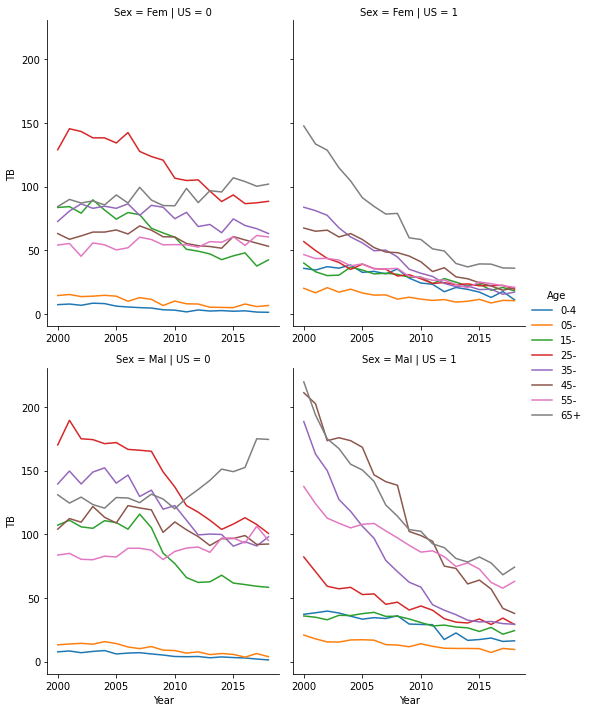

In [13]:
# 5. Same plot with four facets broken down by sex and whether or not
# they are US-born. (See provided documentation)

# First we need to group by sex as well
averageTb2 = tbDf.groupby(['Year', 'Age', 'Sex', 'US']).mean()

# Reset the index
averageTb2 = averageTb2.reset_index()

# Change year to numeric
averageTb2["Year"] = pd.to_numeric(averageTb2["Year"])

# Plot the lines on our 4 facets
sns.relplot(
    
    # Data, x axis, yaxis
    data=averageTb2, x="Year", y="TB",
    
    # Color it by age, column US, row Sex
    hue="Age", col="US", row='Sex',
    
    # Line plot and aesthetic aspects
    kind="line", height=5, aspect=.75, facet_kws=dict(sharex=False))

In [ ]:
# ----------------------------- PART 2 ------------------------------------

In [15]:
# 1. Compile a dataset of all the NBA player available at these websites. 
# Once you've collected all the data, you should have a dataset with 4897 row and 8 columns.

# Initialize the first letter in the alphabet 
char = 'a'
basketballDf = []

# Loop through the entire alphabet
for i in range(1, 26):
    
    # No x last names
    if char == "x":
        
        # Change char to a number so we can increment it
        val = ord(char[0])
    
        # Increment
        val += 1
    
        # Then change it back into a character
        char = chr(val)
    
    # The string 
    urlString = "https://www.basketball-reference.com/players/" + char + "/" 
    
    # Temp Df
    tempDf = pd.read_html(urlString)
    
    # Add the string to the list
    basketballDf.append(tempDf)
    
    # Change char to a number so we can increment it
    val = ord(char[0])
    
    # Increment
    val += 1
    
    # Then change it back into a character
    char = chr(val)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)>

In [80]:
# We need to convert our list to 2 dimensional

# Create a temporary list
Output = []

# Loop through the basketball dataframe
for temp in basketballDf:
    
    # For every element in temp
    for elem in temp:
        
        # Just append the element
        Output.append(elem)

# Create a final list
finalList = []

# Loop through all of the tables
for value in range(25):

    # Append it
    finalList.append(pd.DataFrame(Output[value]))

In [83]:
# Merge the list of tables together
merged = pd.concat(finalList)

# Turn into a dataframe
finalBall = pd.DataFrame(merged)

# Check it out
finalBall.head()

# Reset the index
finalBall = finalBall.reset_index()

In [84]:
# ANSWER: Here is our final dataset
print(finalBall.head())

   index                Player  From    To  Pos    Ht     Wt  \
0      0        Alaa Abdelnaby  1991  1995  F-C  6-10  240.0   
1      1       Zaid Abdul-Aziz  1969  1978  C-F   6-9  235.0   
2      2  Kareem Abdul-Jabbar*  1970  1989    C   7-2  225.0   
3      3    Mahmoud Abdul-Rauf  1991  2001    G   6-1  162.0   
4      4     Tariq Abdul-Wahad  1998  2003    F   6-6  223.0   

         Birth Date                  Colleges  
0     June 24, 1968                      Duke  
1     April 7, 1946                Iowa State  
2    April 16, 1947                      UCLA  
3     March 9, 1969                       LSU  
4  November 3, 1974  Michigan, San Jose State  


In [85]:
# 2. Cast "From" "To" and "Wt" to numeric Data
finalBall["To"] = pd.to_numeric(finalBall["To"])
finalBall["From"] = pd.to_numeric(finalBall["From"])
finalBall["Wt"] = pd.to_numeric(finalBall["Wt"])

In [86]:
# 2a. years_played = number of years played (to - from + 1)

# Create the years played column
finalBall['years_played'] = ""

# Convert it to a numeric
finalBall['years_played'] = pd.to_numeric(finalBall['years_played'])

In [87]:
# Loop through the entire dataset
for i in range(4897):
    
    # Calculate the number of years played
    num = (finalBall['To'][i] - finalBall['From'][i]) + 1
    
    # Assign the value
    finalBall['years_played'][i] = num

<ipython-input-87-429075aa5dc7>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
# 2b. Ht_in = heaight in inches
# finalBall.head()


# Create a temporary height column
finalBall['Feet'] = ""
finalBall['Inches'] = ""

# Loop through the entire dataframe
for i in range(4897):
    
    # Assign the feet column
    finalBall['Feet'][i] = finalBall['Ht'][i][0]

    # If they are 10, 11 or 12 inches
    if(len(finalBall['Ht'][i]) == 4):
        
        # Then assign the last 2 digits
        finalBall['Inches'][i] = finalBall['Ht'][i][2:4] 
        
    else:
        finalBall['Inches'][i] = finalBall['Ht'][i][2:3]

# Change both of the columns to numeric
finalBall['Feet'] = pd.to_numeric(finalBall['Feet'])
finalBall['Inches'] = pd.to_numeric(finalBall['Inches'])

# Create the height in inches column
finalBall['Ht_in'] = ""
finalBall['Ht_in'] = pd.to_numeric(finalBall['Ht_in'])

# Loop through the dataset
for i in range(4897):
    
    # Calculate feet in inches
    val = (finalBall['Feet'][i]) * 12.0
    
    # Get our final value
    finalVal = val + (finalBall['Inches'][i])
    
    # Assign it
    finalBall['Ht_in'][i] = finalVal

    
# Drop what we don't need
finalBall = finalBall.drop(['Feet', 'Inches'], axis=1)

<ipython-input-88-8a3a216401e2>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-8a3a216401e2>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-8a3a216401e2>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-8a3a216401e2>:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [89]:
# 2c. Hall of fame (1 or 0)
finalBall['HOF'] = ""
finalBall['HOF'] = pd.to_numeric(finalBall['HOF'])

# Loop through the entire dataset
for i in range(4897): 
    
    # If there is an asterisk...
    if(finalBall['Player'][i][-1:] == "*"):
        
        # Hall of Fame is true
        finalBall['HOF'][i] = 1
        
    # Other wise they are not
    else:
        finalBall['HOF'][i] = 0

<ipython-input-89-8a0b761a9241>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-89-8a0b761a9241>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
# 2d. start_age = Age at entrance to NBA 
finalBall['Birth Date'] = finalBall['Birth Date'].astype(str)
finalBall['Birth Year'] = ""

# Loop through the entire dataset
for i in range(4897):
    
    # First control for nan
    if(finalBall['Birth Date'][i] == "nan"):
        
        # Then assign no birth date
        finalBall['Birth Date'][i] == "No Birth Date"

    # Extract the last 4 digits
    finalBall['Birth Year'][i] = finalBall['Birth Date'][i][-4:]


<ipython-input-108-6d7066536ae6>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
# Convert Birth Year to a float
finalBall['Birth Year'] = finalBall['Birth Year'].astype(float)
finalBall['From'] = finalBall['From'].astype(float)

In [121]:
# Create the Start Age variable
finalBall['start_age'] = ""
finalBall['start_age'] = naDF['start_age'].astype(float)

# Loop through the dataset
for i in range(4897):
    
    # Get our values
    value = finalBall['Birth Year'][i]
    otherVal = finalBall['From'][i]
    finalVal = otherVal - value
    
    # Assign it
    finalBall['start_age'][i] = finalVal
    
# NOTE: I know my logic is right, but I'm struggling parsing some strings

ValueError: could not convert string to float: ''

In [ ]:
# ANSWER TO QUESTION 2: Here's the final data
print(finalBall.head())

In [23]:
# 3. What is the latest "To" year of the players in the Hall of Fame?
tempDf = finalBall['HOF'] == 1.0
hofDf = finalBall[tempDf]

# Check what year the max wax
hofDf['To'].max()

# Filter by 2017
tempDf = finalBall['To'] == 2017
latestDf = finalBall[tempDf]

#Filter by Hall of Fame
tempDf = latestDf['HOF'] == 1.0
checkDf = latestDf[tempDf]

# Look
checkDf.head()

# ANSWER: Paul Pierce is the most recent Hall of Fame inductee

,index,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,years_played,Ht_in,HOF,Birth Year,start_age
3452,126,Paul Pierce*,1999,2017,F-G,6-7,235.0,"October 13, 1977",Kansas,19.0,79.0,1.0,,NaN


<AxesSubplot:xlabel='HOF', ylabel='Ht_in'>

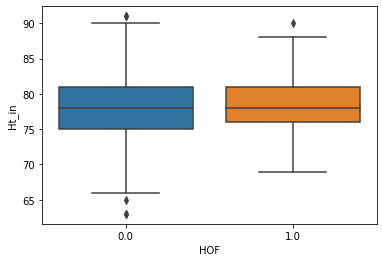

In [24]:
# 4. Make side-by-side boxplots of height in inches by whether or not a player is in the Hall of Fame.

# Import seaborn
import seaborn as sns

# Create our boxplot
sns.boxplot(x="HOF", y = "Ht_in", data = finalBall)

<AxesSubplot:xlabel='HOF', ylabel='Wt'>

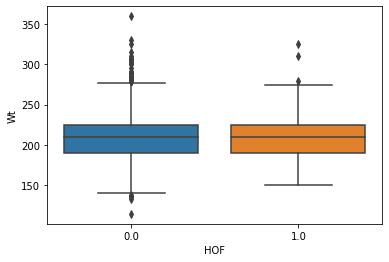

In [39]:
# 5. Make side-by-side boxplots of weight by whether or not a player is in the Hall of Fame.
sns.boxplot(x="HOF", y = "Wt", data = finalBall)

<AxesSubplot:xlabel='HOF', ylabel='years_played'>

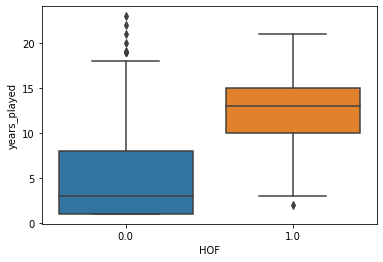

In [38]:
# 6. Make side-by-side boxplots of years played by whether or not a player is in the Hall of Fame.
sns.boxplot(x="HOF", y = "years_played", data = finalBall)

# Note: This is the first that seems significant

In [ ]:
# 7. Make side-by-side boxplots of age at entrance into the NBA by whether or not a player is in the Hall of Fame.
sns.boxplot(x="HOF", y = "years_played", data = finalBall)

# Note: I couldn't get my "start_age" variable to work, but this ^^^^ would be the code

In [27]:
# ----------------------------- PART 3 ------------------------------------
# Use the "babynames.csv" dataset from class (Learning Suite October 5)
names = pd.read_csv('babynames.csv')

In [28]:
# 1. Subset the data with only names that start with "Kris", "Cris", "Chris"

# First lets create the Kris dataset
tempDf = names['name'] == "Kris"
krisDf = names[tempDf]

# tempDf= 
tempDf = names['name'] == "Chris"
chrisDf = names[tempDf]

# Finally for Cris
tempDf = names['name'] == "Cris"
crisDf = names[tempDf]

In [29]:
# Add each of the dataframes to a list so we can merge
namesList = []
namesList.append(krisDf)
namesList.append(chrisDf)
namesList.append(crisDf)

# Put them all together
namesFinal = pd.concat(namesList)

In [30]:
# 2. What are the most common male and female names in the subsetted data?
namesFinal.groupby(['name', 'sex']).sum()

# ANSWER: The most Common Male AND Female name is "Chris"

year       n      prop
name  sex                          
Chris F    196652   22904  0.012223
      M    268893  144112  0.086183
Cris  F     84618    1088  0.000572
      M    179296    2900  0.001560
Kris  F    154323   13490  0.007252
      M    158199   13982  0.007316

In [40]:
# 3. Using plotly express, make a plot of the names over time with aggregated frequency 
# (either proportion or count is fine) on the y-axis, year on the x-axis, and separate 
# lines for males and females. (See example below - or figure "pxfig.png" in repository).

# Import plotyly.express as px
import plotly.express as px

# Group by sex and year, reset the index
plotDf = namesFinal.groupby(['sex', 'year']).sum()
plotDf = plotDf.reset_index()

# Plot this
figure = px.line(plotDf, x = 'year', y = 'n', color = 'sex', title = "Frequency of variations of the name 'Chris' over time")
figure.show()